# **Milestone 1**

## **Context**
Cars4U is a start-up that will buy and sell used cars leveraging the advantages of machine learning. The business needs to manage the uncertainities in used car pricing and provide the market with a satisfactory pricing model for both sellers and buyers. To attract buyers and sellers, we need to be able to set the correct price of a user car that maximizes the profit for the business.  

### **The objectives:**

 Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

**The key questions:**

- What are the predictors of the price 



**The problem formulation**:

- We are trying to use data science to find 

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [193]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [194]:
data = pd.read_csv("..\\..\\Public_Datasets\\used_cars.csv")

### **Understand the data by observing a few rows**

In [195]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [196]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights: **

We have twelve independent variables in the data: five categorical and seven numerical. 

### **Let us check the data types and and missing values of each column** 

In [197]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [198]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights: **

We have 6,019 observations with price not null. To be used as predictors, we would need to impute missing values for Mileage (2), Engine (46), Power (175), Seats (53) and New Price (6247).  

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [199]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns=['S.No.'], inplace=True)


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [200]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


#### **Observations and Insights: **
- 75% of the cars were made on or after 2011. The mean value is 2013.  
- The mean km driven is 59KM. 
- The minimum value for mileage is 0. There appears to be some bad data since that is impossible unless the car isn't running.
- Most engines are are close to 1,500CC with some outliers. 
- The power looks similar to the engine in terms of spread. 
- Most of the cars have 5 seats. 
- The mean new price is over 2 times greater than the mean price for a used car. 




### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [201]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts(normalize=True))
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD               0.007583
Maruti Swift VDI                     0.006756
Maruti Swift Dzire VDI               0.005791
Honda City 1.5 S MT                  0.005377
Maruti Swift VDI BSIV                0.005101
                                       ...   
Tata Safari Storme VX Varicor 400    0.000138
Skoda Fabia 1.2 TDI Ambition         0.000138
Maruti Ciaz 1.4 Alpha                0.000138
Skoda Octavia Rider 1.9 TDI MT       0.000138
Maruti Wagon R VXi BSII              0.000138
Name: Name, Length: 2041, dtype: float64
--------------------------------------------------
For column: Location
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
--------------------------------------------------
For column: Fuel_Type
Diesel 

**Number of unique observations in each category**

In [202]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].nunique())
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights: **
- There are many unique names. Also, in future predictions, there will be new names not trained in the model. 
- All eleven locations have at least some data. 
- Fuel Type is mostly Diesel or Petrol. Very few cars are CNG, LPG, or electric. 
- Over 70% of the observations have manual transmissions. 
- Over 80% of the cars are first owners. 

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [203]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: **


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [204]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(data.index[2328], inplace=True)

**Check Mileage extreme values**

In [205]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [206]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

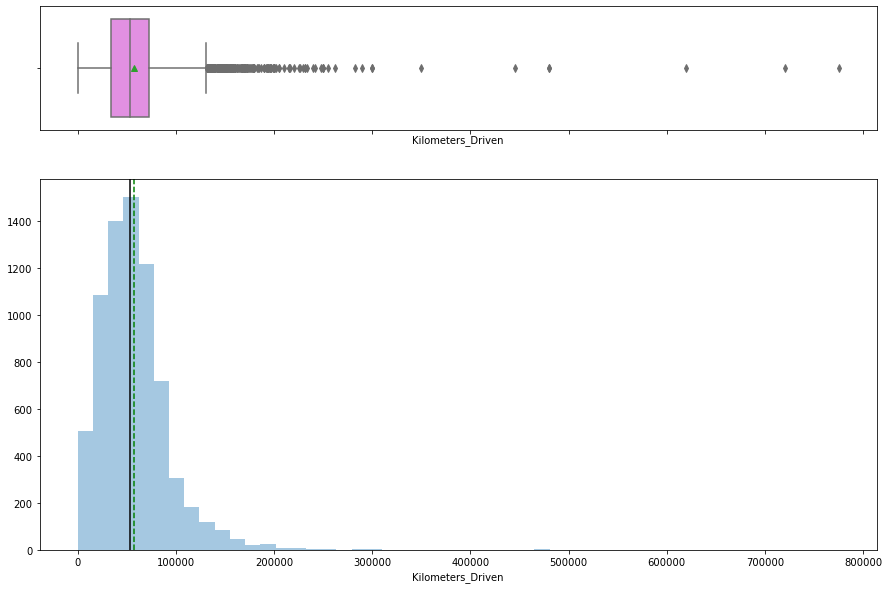

In [207]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

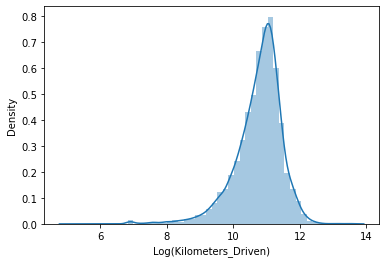

In [208]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights: **
Log transfrom of Kilometers Driven gives a more normal distribution. This will allow us to use this feature in a regression model. 

In [209]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

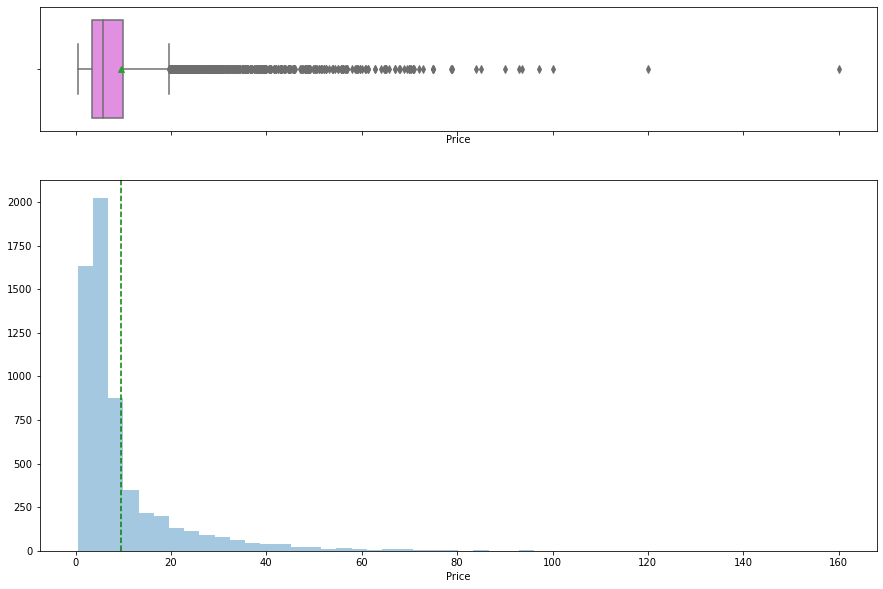

In [210]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

In [211]:
# Log transformation of the feature 'Price'
data["price_log"] = np.log(data["Price"])


#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

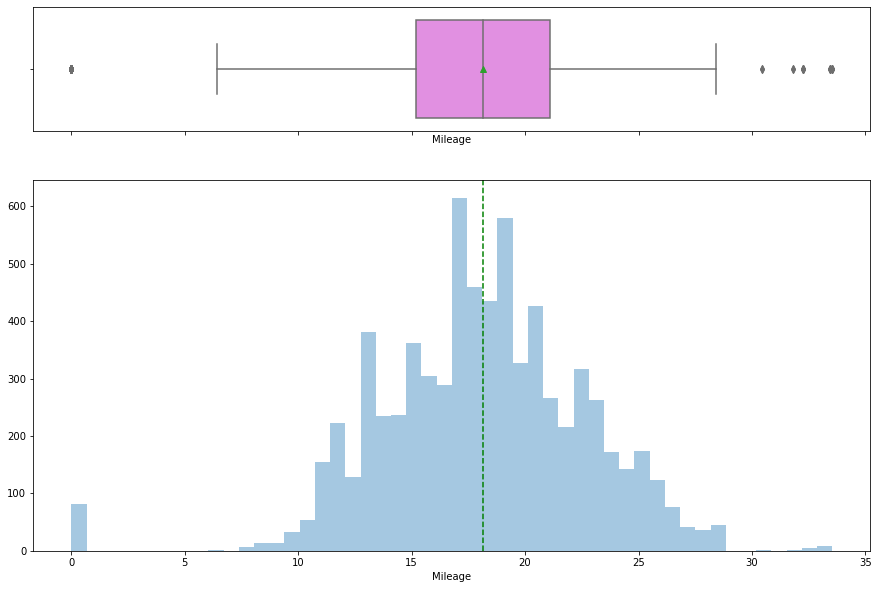

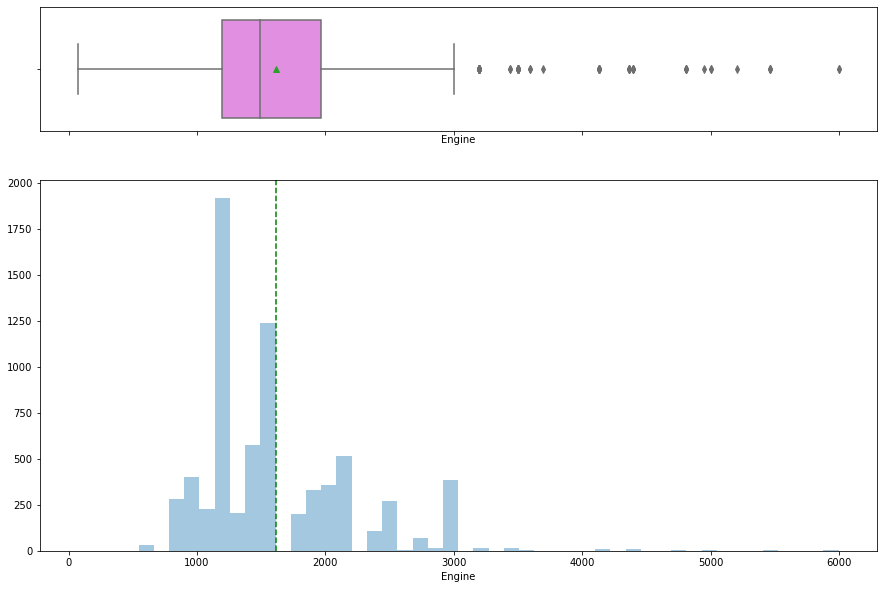

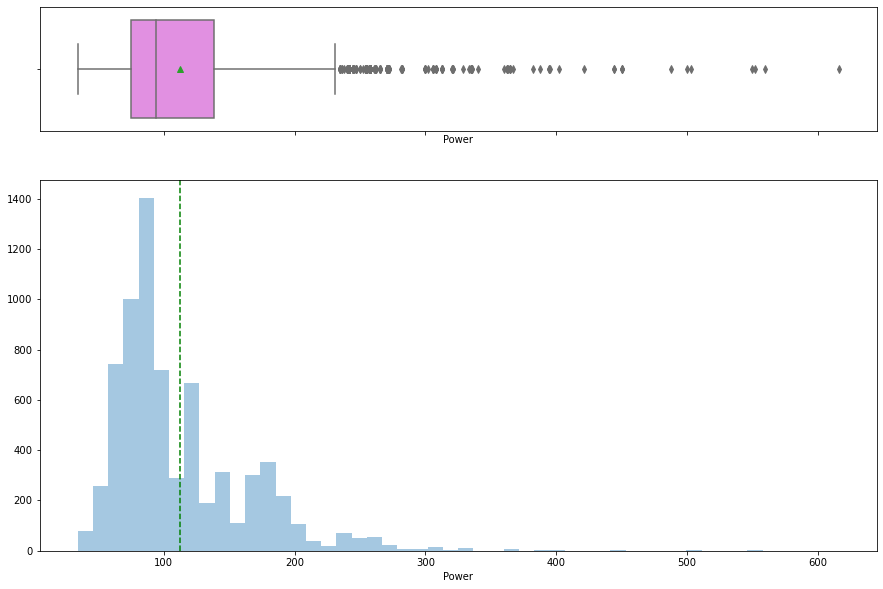

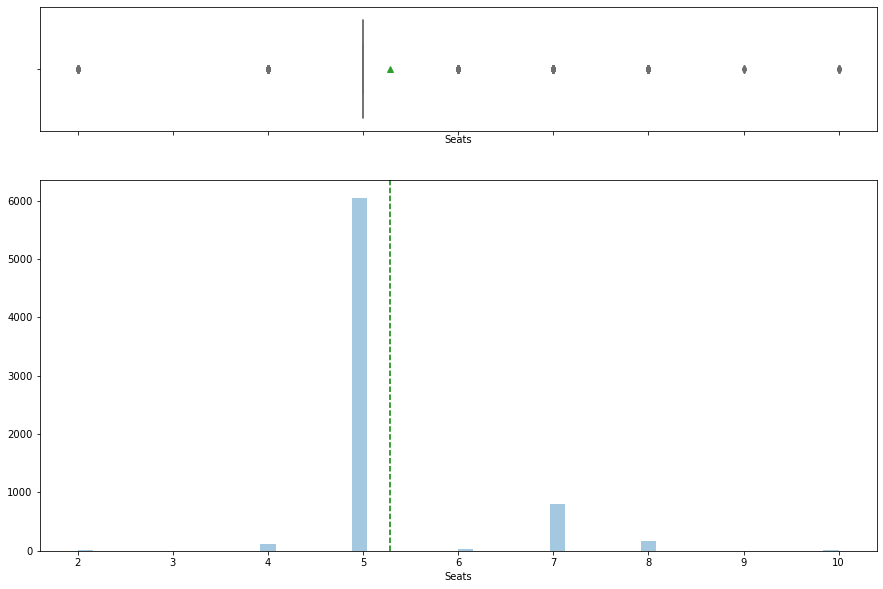

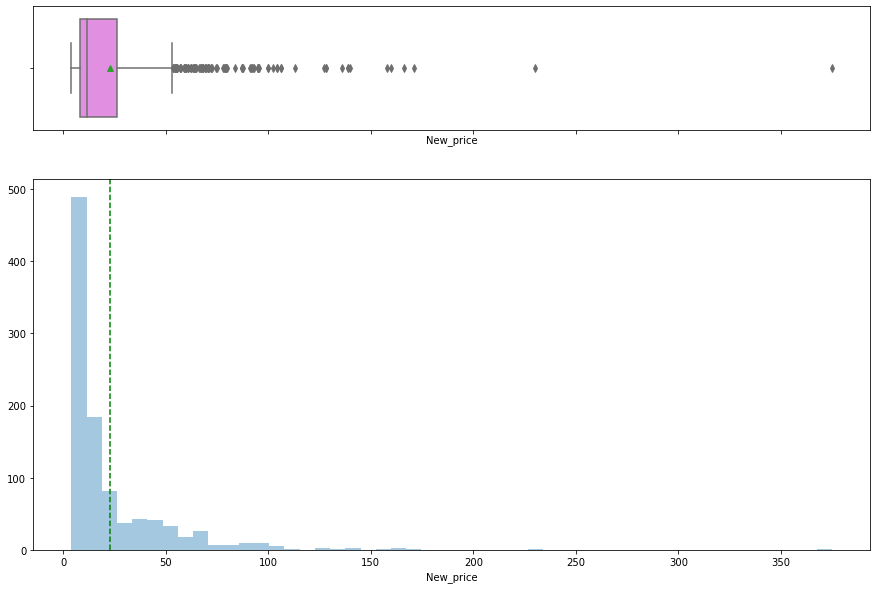

In [212]:
histogram_boxplot(data['Mileage'])
histogram_boxplot(data['Engine'])
histogram_boxplot(data['Power'])
histogram_boxplot(data['Seats'])
histogram_boxplot(data['New_price'])


#### **Observations and Insights for all the plots: **

- Many of the variables are right-skewed: Kilometers_Driven, Price, New_price, Power, and Engine. We transformed Kilometers_Driven and Price and they are now normally distributed. 
- We have ~80 values for Price at 0 and that is not possible. 
- Seats are categorical and not numeric. 


## **2. Univariate analysis - Categorical Data**

In [213]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

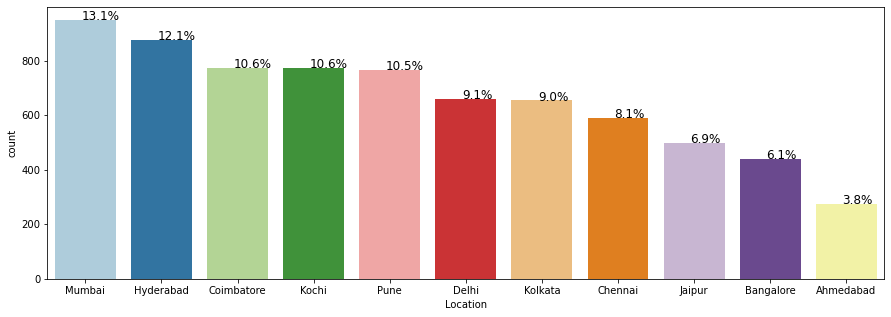

In [214]:
#Bar Plot for 'Location'
perc_on_bar('Location')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

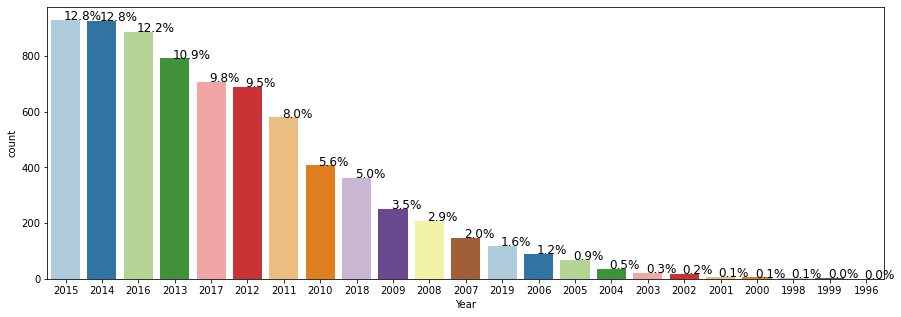

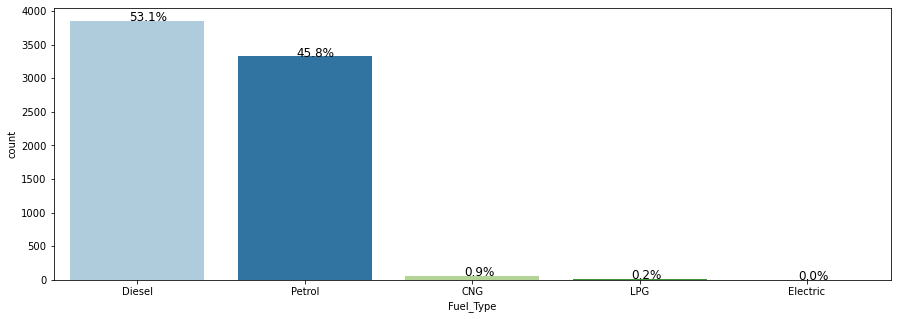

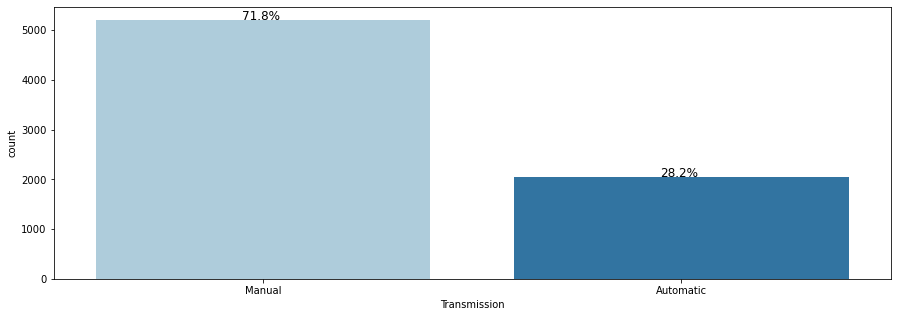

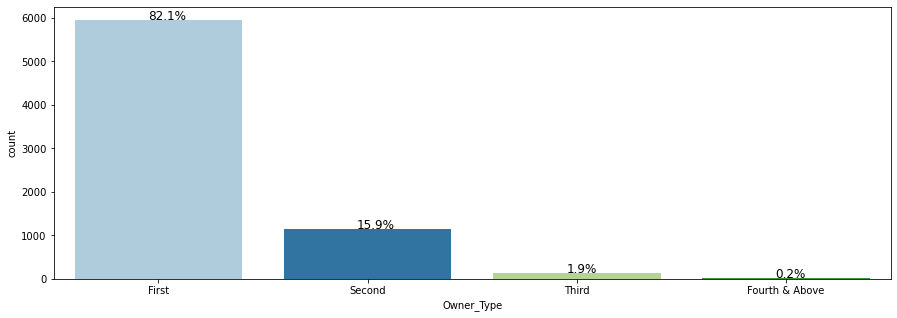

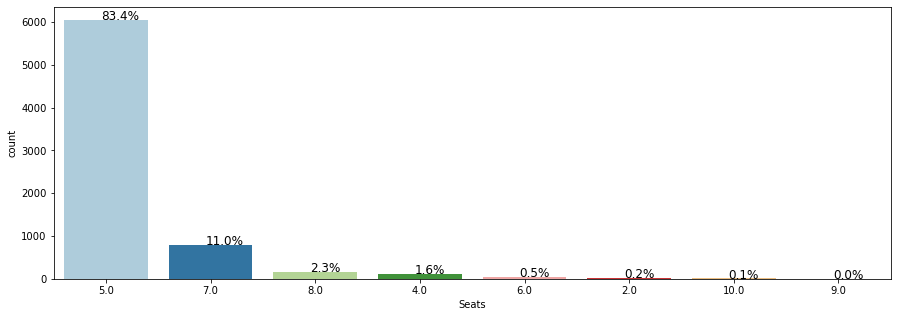

In [215]:
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')
perc_on_bar('Seats')


#### **Observations and Insights from all plots: **

- All 11 locations are well-represented in the data. 
- Years before 2006 are not frequent in the data. This may need be treated numerically. 
- Alternative fuel types are not well-represented. 
- There are not many 2-seater cars in India. If we use this numerically, we need to watch how it tests out with 2-seaters since those may be luxury cars. 

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

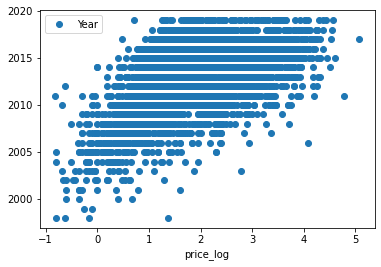

In [216]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='price_log', y='Year', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

<AxesSubplot:xlabel='Engine'>

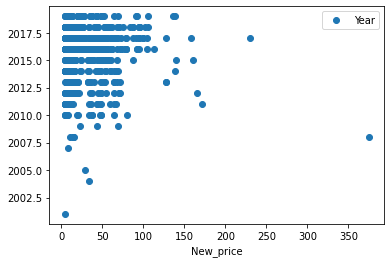

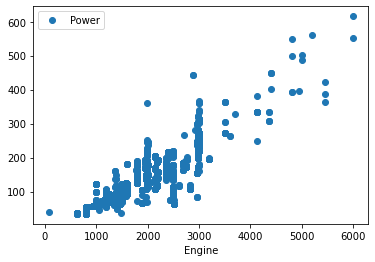

In [217]:
data.plot(x='New_price', y='Year', style='o')
data.plot(x='Engine', y='Power', style='o')


#### **Observations and Insights from all plots: **

- Newer used cars sell for more.  
- It doesn't appear that new prices increase with time
- Power and Engine have a positive relationship with some variation. 


### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

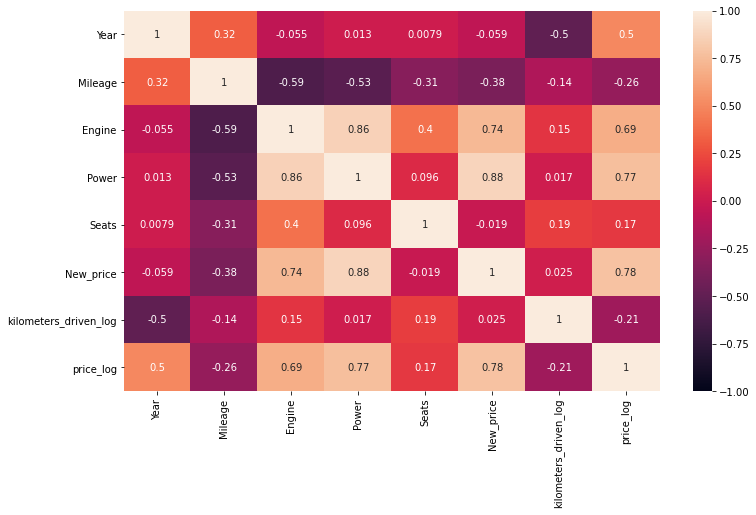

In [218]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven', 'Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: **

- Strong correlation exists between Power and Engine. We need to be aware of multicollinearity. 
- Strong correlations exists between New Price and both Power and Engine. 
- The Price is positively correlated with New Price, Power/Engine, and Year. 

### **3. Box plot**

In [219]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

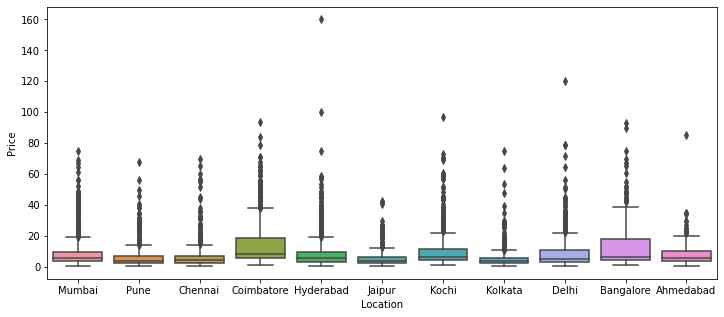

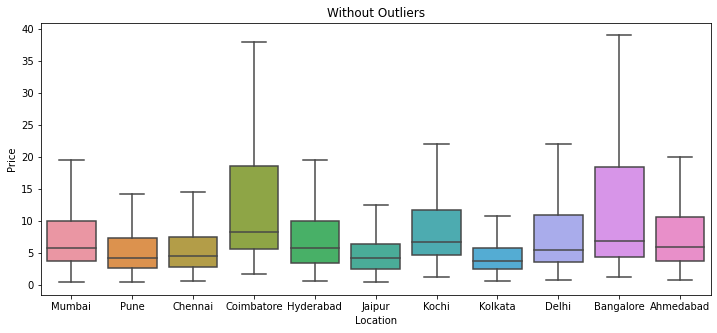

In [220]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

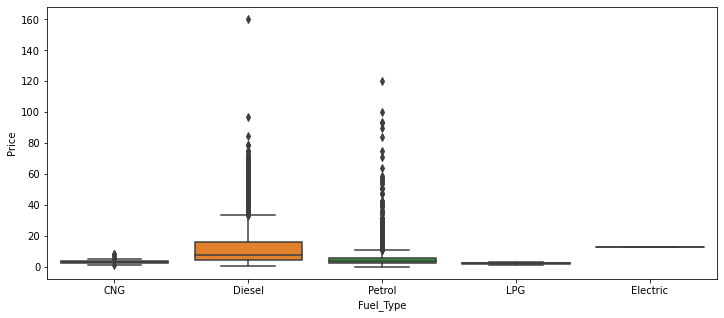

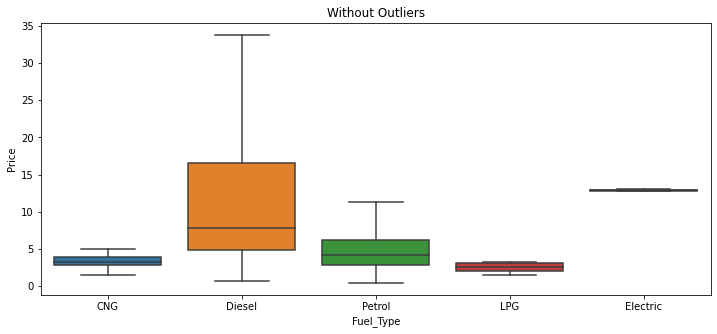

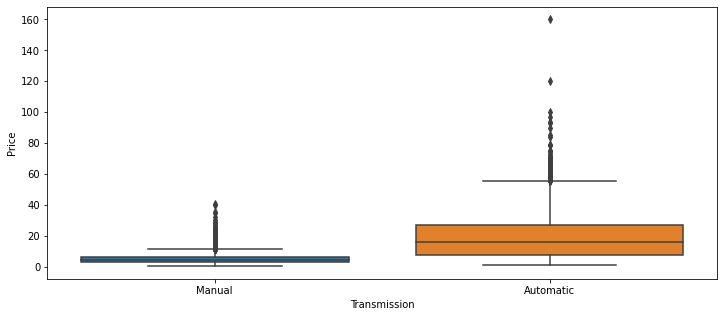

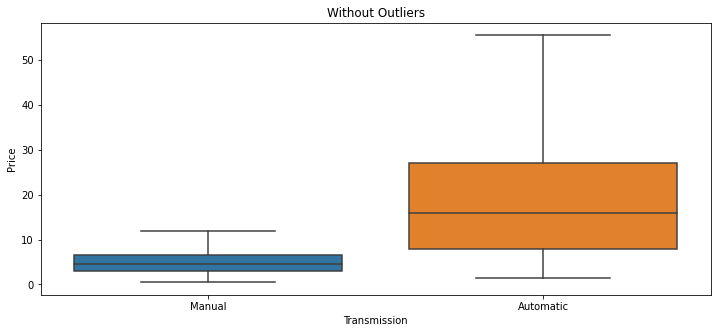

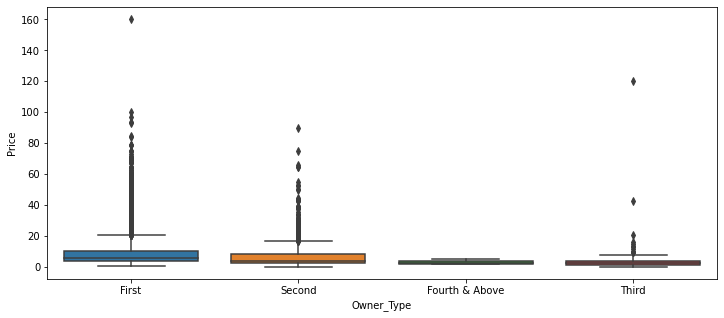

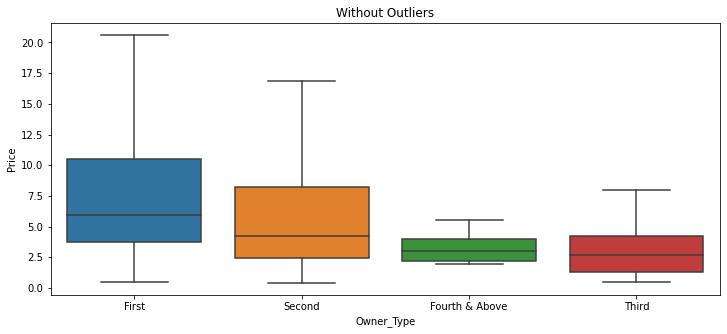

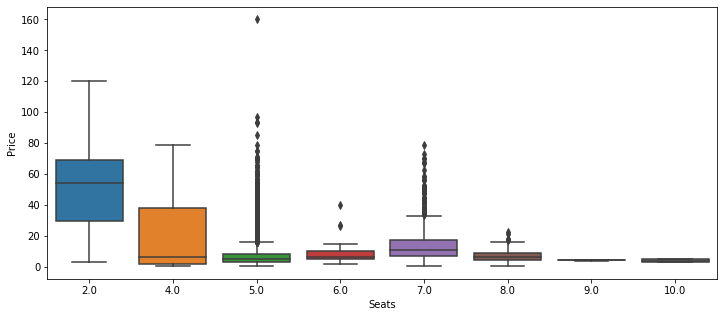

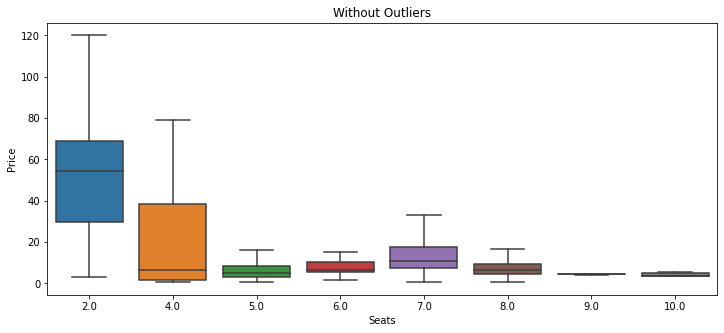

In [221]:
boxplot(data['Fuel_Type'])
boxplot(data['Transmission'])
boxplot(data['Owner_Type'])
boxplot(data['Seats'])

**Observations and Insights for all plots**
- We need to impute missing values for five variables.
- Name isn't useful and will need to be split.
- Location has 11 unique values. 
- There are only a few cars before 2006 and they become more infrequent as the year decreases. 
- Kilometers Driven was log transformed and the log variable has a normal distribution.
- Used cars running on diesel sell higher on average than petrol cars. There are not many observations with alternative fuel types.
- Used cars with automatic transmissions sell for more than automatic. 
- Over 80% of used cars are first owner types and they sell for more than cars with more owners
- Mileage has a moderately negative relationship with Price.
- Engine and Power are highly correlated and both have a positive relationship with Price 
- Most cars have 5 seats. We see that cars with two seats have higher prices than any other number of seats but there are very few observations. 



### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [222]:
new = data['Name'].str.split(' ', 1, expand = True)
data['Brand'] = new[0]
data['Model'] = new[1]

In [223]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic


### **Missing value treatment**

In [224]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights: **

We have 5 variables with missing data and also have Mileage with 0 values. 

**Missing values in Seats**

In [310]:
# Checking missing values in the column 'Seats'
data[data['Seats'].isna()].filter(items=['Brand', 'Model', 'Seats'])
#data[data['Model'].str.contains('TUV')].filter(items=['Brand', 'Model', 'Seats'])

,Brand,Model,Seats


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [309]:
# Impute missing values in Seats,you can use fillna method in pandas
fillValue = data[data['Model'].str.contains('City 1.5 GXI')].filter(items=['Seats']).median()
print('Median for City 1.5: ', fillValue[0])
data.loc[data['Model'].str.contains('City 1.5 GXI'), 'Seats'] = data.loc[data['Model'].str.contains('City 1.5 GXI'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Model'].str.contains('Figo Diesel')].filter(items=['Seats']).median()
print('Median for Figo Diesel: ', fillValue[0])
data.loc[data['Model'].str.contains('Figo Diesel'), 'Seats'] = data.loc[data['Model'].str.contains('Figo Diesel'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Brand'].str.contains('Maruti')].filter(items=['Seats']).median()
print('Median for Maruti using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Maruti'), 'Seats'] = data.loc[data['Brand'].str.contains('Maruti'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Model'].str.contains('Rover Range Rover 3.0 D')].filter(items=['Seats']).median()
print('Median for Rover Range Rover 3.0 D: ', fillValue[0])
data.loc[data['Model'].str.contains('Rover Range Rover 3.0 D'), 'Seats'] = data.loc[data['Model'].str.contains('Rover Range Rover 3.0 D'), 'Seats'].fillna(fillValue[0])
data.loc[data['Model'].str.contains('Rover Range Rover Sport 2005 2012 Sport'), 'Seats'] = data.loc[data['Model'].str.contains('Rover Range Rover Sport 2005 2012 Sport'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Model'].str.contains('Endeavour')].filter(items=['Seats']).median()
print('Median for Endeavour: ', fillValue[0])
data.loc[data['Model'].str.contains('Endeavour'), 'Seats'] = data.loc[data['Model'].str.contains('Endeavour'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Model'].str.contains('Punto')].filter(items=['Seats']).median()
print('Median for Punto: ', fillValue[0])
data.loc[data['Model'].str.contains('Punto'), 'Seats'] = data.loc[data['Model'].str.contains('Punto'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Model'].str.contains('Laura')].filter(items=['Seats']).median()
print('Median for Laura: ', fillValue[0])
data.loc[data['Model'].str.contains('Laura'), 'Seats'] = data.loc[data['Model'].str.contains('Laura'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Model'].str.contains('TUV')].filter(items=['Seats']).median()
print('Median for TUV: ', fillValue[0])
data.loc[data['Model'].str.contains('TUV'), 'Seats'] = data.loc[data['Model'].str.contains('TUV'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Brand'].str.contains('Honda')].filter(items=['Seats']).median()
print('Median for Honda using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Honda'), 'Seats'] = data.loc[data['Brand'].str.contains('Honda'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Brand'].str.contains('Hyundai')].filter(items=['Seats']).median()
print('Median for Hyundai using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Hyundai'), 'Seats'] = data.loc[data['Brand'].str.contains('Hyundai'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Brand'].str.contains('Toyota')].filter(items=['Seats']).median()
print('Median for Toyota using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Toyota'), 'Seats'] = data.loc[data['Brand'].str.contains('Toyota'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Brand'].str.contains('BMW')].filter(items=['Seats']).median()
print('Median for BMW using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('BMW'), 'Seats'] = data.loc[data['Brand'].str.contains('BMW'), 'Seats'].fillna(fillValue[0])


Median for City 1.5:  5.0
Median for Figo Diesel:  5.0
Median for Maruti using Brand:  5.0
Median for Rover Range Rover 3.0 D:  5.0
Median for Endeavour:  7.0
Median for Punto:  5.0
Median for Laura:  5.0
Median for TUV:  7.0
Median for Honda using Brand:  5.0
Median for Hyundai using Brand:  5.0
Median for Toyota using Brand:  7.0
Median for BMW using Brand:  5.0


In [314]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data[data['Seats'].isnull()].filter(items=['Brand', 'Model', 'Seats'])

,Brand,Model,Seats


**Missing values for Mileage**

In [322]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

In [316]:
# Impute missing Mileage. For example use can use median or any other methods.
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)

**Missing values for Engine**

In [318]:
data['Engine'].fillna(data['Engine'].median(), inplace=True)

**Missing values for Power**

In [319]:
data['Power'].fillna(data['Power'].median(), inplace=True)

**Missing values for New_price**

In [321]:
data['New_price'].fillna(data['New_price'].median(), inplace=True)

#### **Observations for missing values after imputing: **

All missing values for predictor variables have been imputed. 

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?

We can further engineer features after we see the model results. Some data is still skewed and some may cause multicolinearity. 

- **Overall solution design -** What is the potential solution design?

Since we are predicted price which is a continuous variable and the predictors are a mix of categorical and numeric, we can use multiple linear regression. 

- **Measures of success -** What are the key measures of success?

We should be able to explain how the predictor variables affect the price of a used car. 